In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objects as go
sns.set_theme(style="whitegrid")


In [2]:
df = pd.read_csv(r"C:\Users\asuna\Downloads\data_sensors.csv",parse_dates=['timestamp'])

In [3]:
df.drop_duplicates(inplace=True)
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16789 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16789 non-null  datetime64[ns]
 1   equipment_energy_consumption  15948 non-null  object        
 2   lighting_energy               15983 non-null  object        
 3   zone1_temperature             15927 non-null  object        
 4   zone1_humidity                15990 non-null  object        
 5   zone2_temperature             15941 non-null  object        
 6   zone2_humidity                15926 non-null  float64       
 7   zone3_temperature             15991 non-null  float64       
 8   zone3_humidity                15912 non-null  float64       
 9   zone4_temperature             15978 non-null  float64       
 10  zone4_humidity                16014 non-null  float64       
 11  zone5_temperature             159

In [5]:
num_cols = df.columns.drop('timestamp')
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                        float64
zone1_temperature                      float64
zone1_humidity                         float64
zone2_temperature                      float64
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         float64
outdoor_tempe

In [6]:
#finding null values
for col in df.columns:
    missing=sum(df[col].isnull())
    print(col,'-',missing)

timestamp - 0
equipment_energy_consumption - 909
lighting_energy - 861
zone1_temperature - 944
zone1_humidity - 886
zone2_temperature - 918
zone2_humidity - 863
zone3_temperature - 798
zone3_humidity - 877
zone4_temperature - 811
zone4_humidity - 775
zone5_temperature - 832
zone5_humidity - 797
zone6_temperature - 842
zone6_humidity - 841
zone7_temperature - 787
zone7_humidity - 800
zone8_temperature - 843
zone8_humidity - 776
zone9_temperature - 771
zone9_humidity - 886
outdoor_temperature - 802
atmospheric_pressure - 841
outdoor_humidity - 794
wind_speed - 822
visibility_index - 809
dew_point - 823
random_variable1 - 824
random_variable2 - 823


In [7]:
# Drop rows where 'equipment_energy_consumption' is NaN
df = df.dropna(subset=['equipment_energy_consumption'])


In [8]:
df = df.sort_values('timestamp')
time_deltas = df['timestamp'].diff()

# Show unique time intervals and their counts
interval_counts = time_deltas.value_counts()
interval_counts

timestamp
0 days 00:10:00     14973
0 days 00:20:00       829
0 days 00:30:00        46
0 days 00:00:00        20
0 days 00:40:00         1
58 days 11:30:00        1
29 days 02:20:00        1
31 days 03:20:00        1
1 days 05:20:00         1
28 days 09:00:00        1
1 days 08:10:00         1
0 days 10:00:00         1
29 days 18:40:00        1
1 days 12:30:00         1
27 days 02:30:00        1
Name: count, dtype: int64

In [9]:


df = df.fillna(df.mean())

In [10]:
#finding null values after removing Nan values from target variable
for col in df.columns:
    missing=sum(df[col].isnull())
    print(col,'-',missing)

timestamp - 0
equipment_energy_consumption - 0
lighting_energy - 0
zone1_temperature - 0
zone1_humidity - 0
zone2_temperature - 0
zone2_humidity - 0
zone3_temperature - 0
zone3_humidity - 0
zone4_temperature - 0
zone4_humidity - 0
zone5_temperature - 0
zone5_humidity - 0
zone6_temperature - 0
zone6_humidity - 0
zone7_temperature - 0
zone7_humidity - 0
zone8_temperature - 0
zone8_humidity - 0
zone9_temperature - 0
zone9_humidity - 0
outdoor_temperature - 0
atmospheric_pressure - 0
outdoor_humidity - 0
wind_speed - 0
visibility_index - 0
dew_point - 0
random_variable1 - 0
random_variable2 - 0


In [11]:
#Graph to check the relation between time and energy consumption
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['timestamp'],
    y=df['equipment_energy_consumption'],
    mode='lines',
    name='Energy Consumption'
))

fig.update_layout(
    title='Equipment Energy Consumption Over Time',
    xaxis_title='Timestamp',
    yaxis_title='Equipment Energy Consumption (Wh)',
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date'
    ),
    template='plotly_white'
)

fig.show()

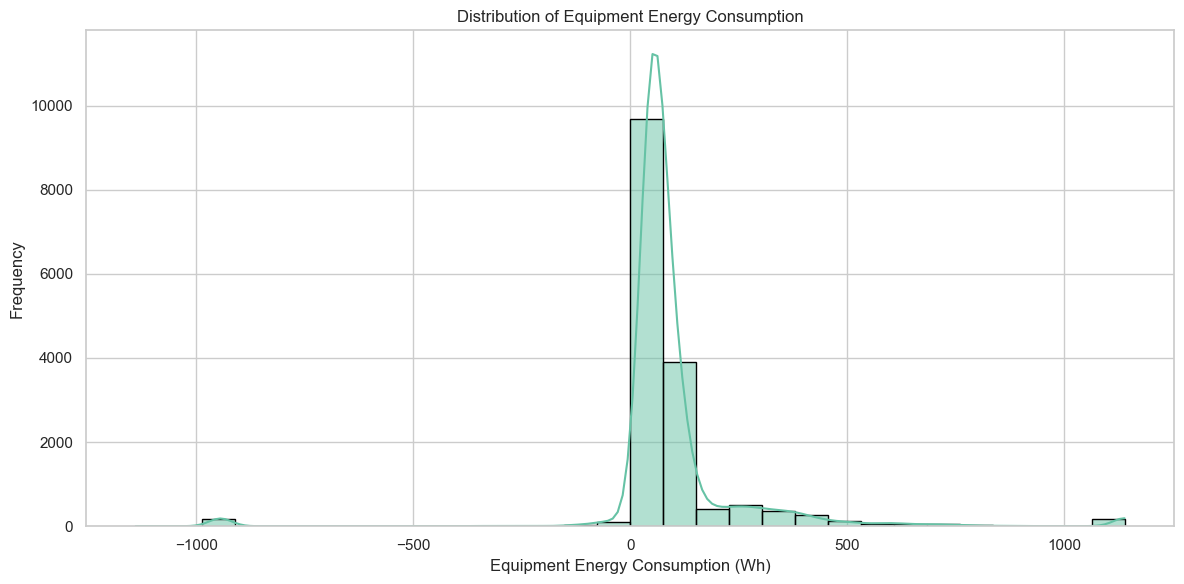


Target variable skewness: 0.6157319159294273


In [12]:
colors = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.histplot(df['equipment_energy_consumption'], bins=30, kde=True,
             color=colors[0], edgecolor='black')
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Equipment Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nTarget variable skewness:", df['equipment_energy_consumption'].skew())

The target variable equipment_energy_consumption is moderately right-skewed (skewness ~0.615). This is common for consumption data. While some models are robust to this, for linear models, a transformation (like log-transform) might be considered later if performance is poor or residuals show issues but considering there are negetive values it is better to continue with this skewness.

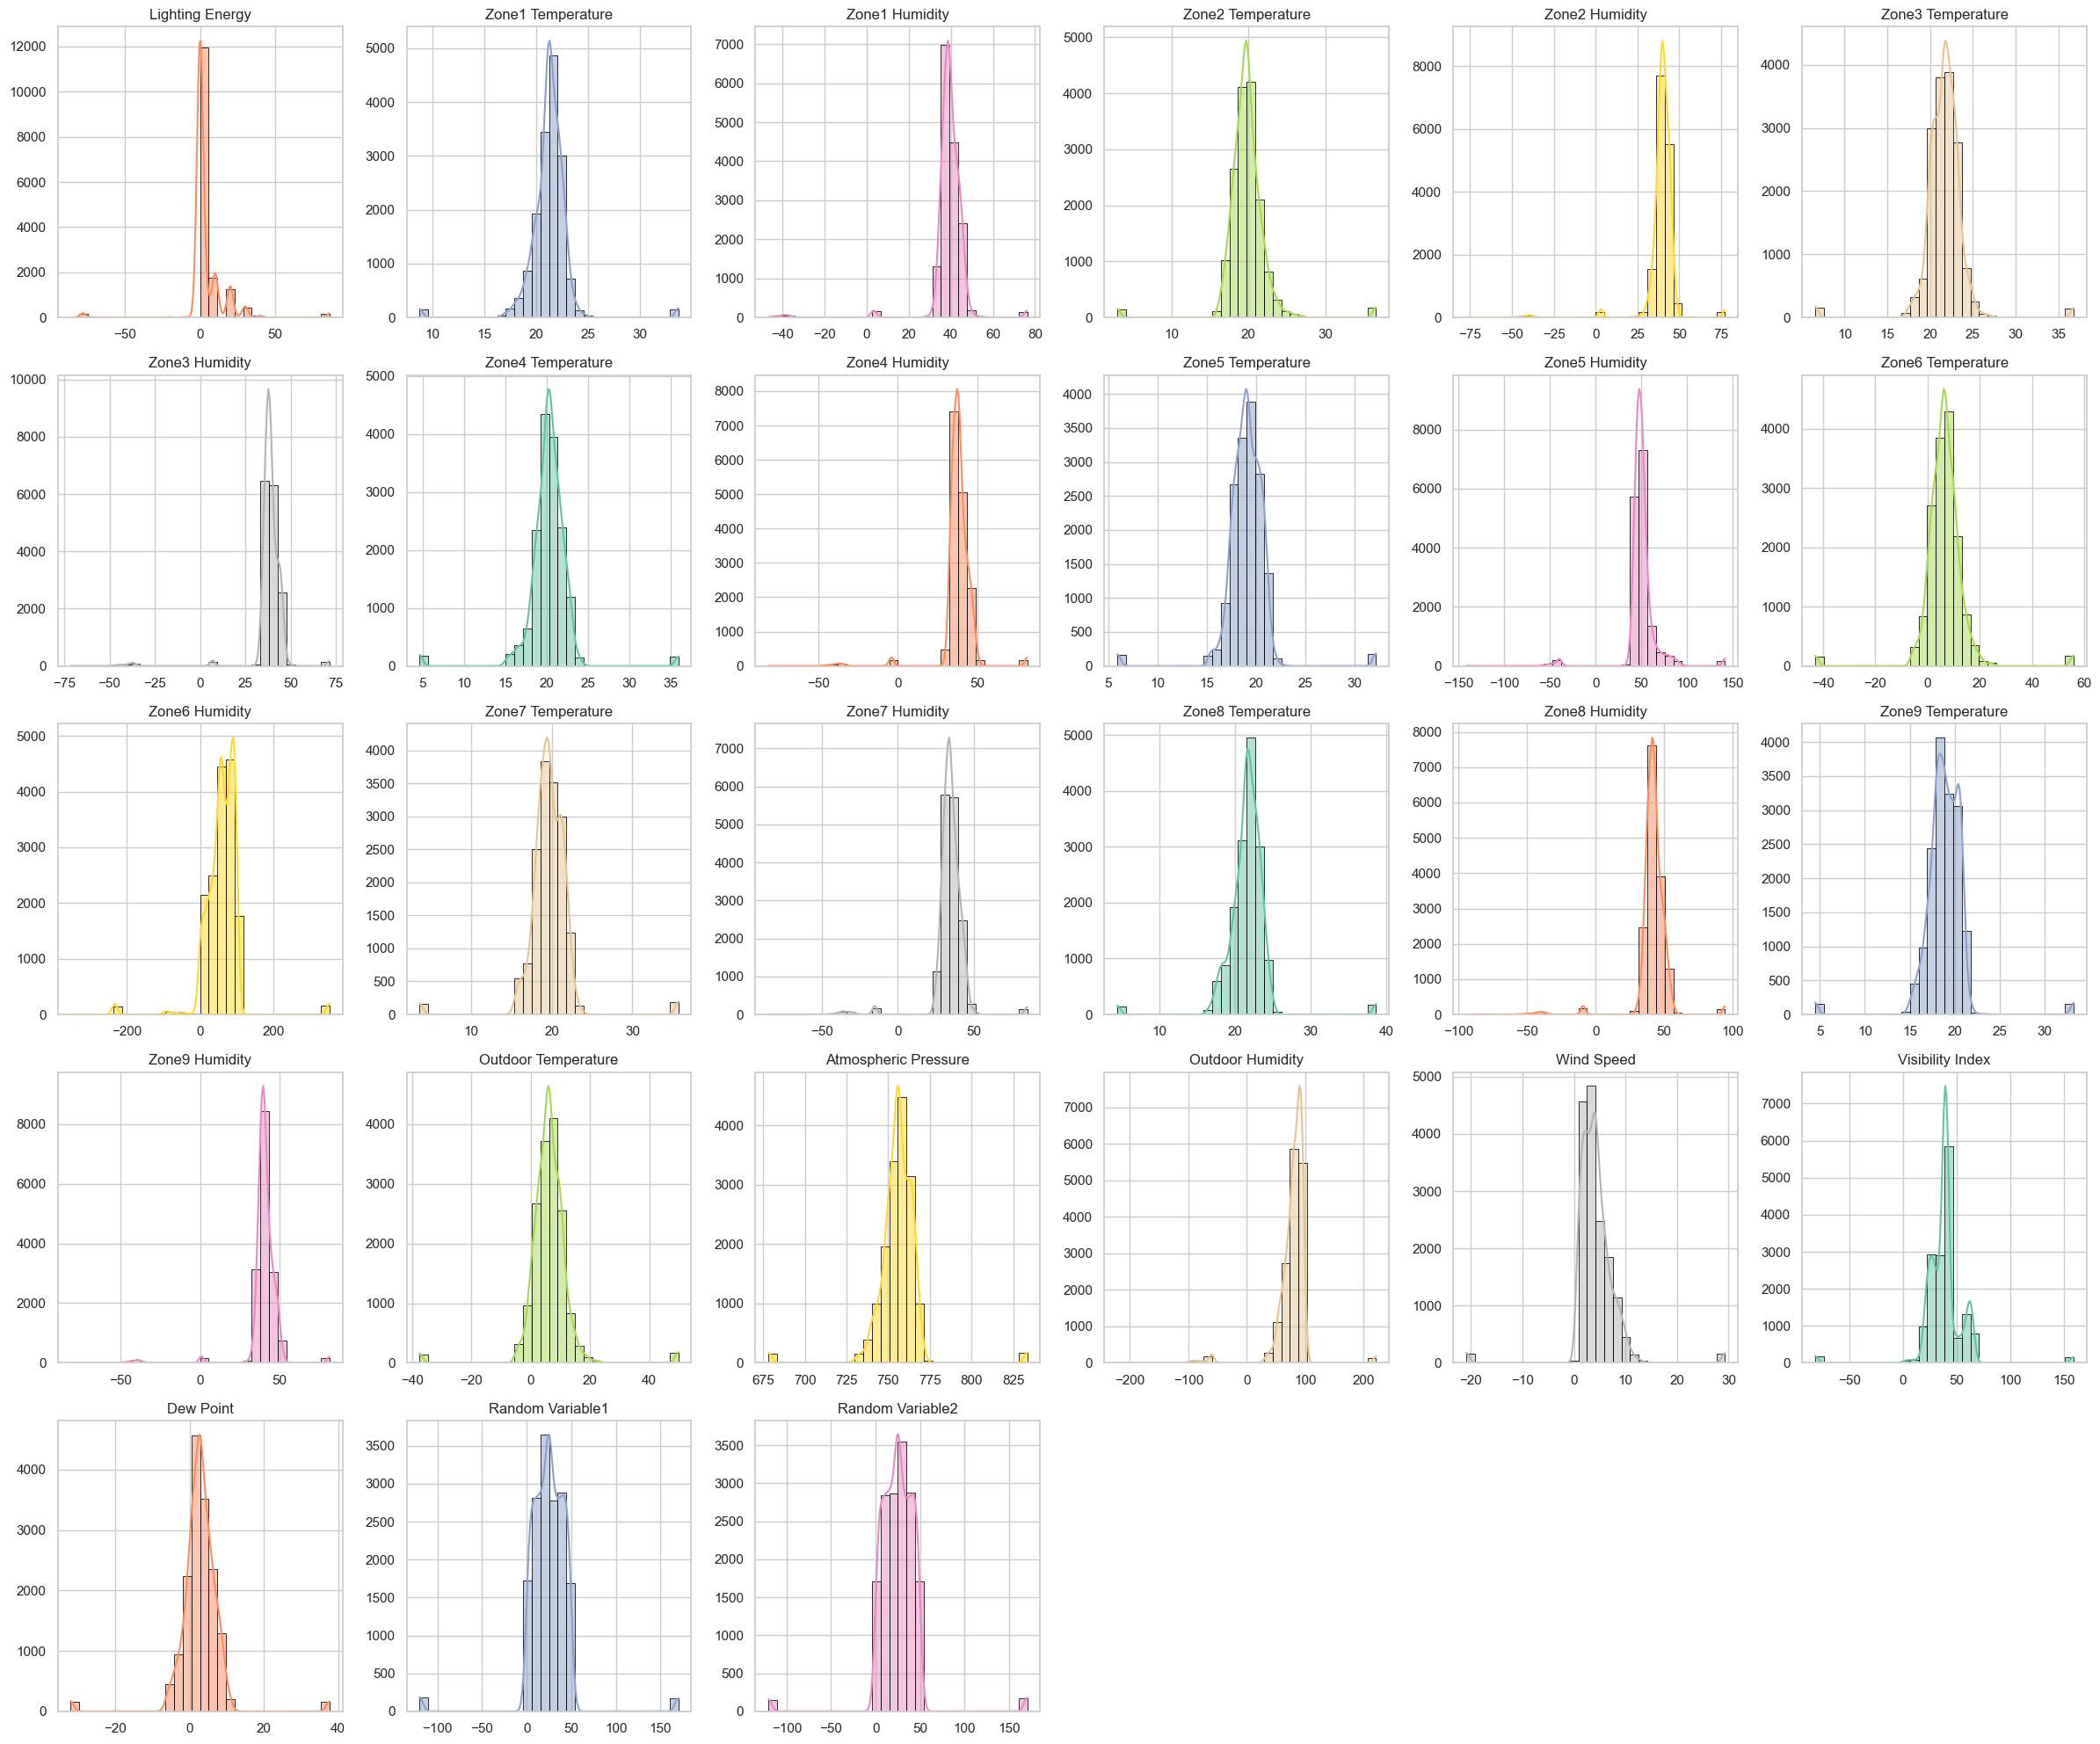

In [13]:
other_cols = [
    'lighting_energy',
    'zone1_temperature','zone1_humidity',
    'zone2_temperature','zone2_humidity',
    'zone3_temperature','zone3_humidity',
    'zone4_temperature','zone4_humidity',
    'zone5_temperature','zone5_humidity',
    'zone6_temperature','zone6_humidity',
    'zone7_temperature','zone7_humidity',
    'zone8_temperature','zone8_humidity',
    'zone9_temperature','zone9_humidity',
    'outdoor_temperature',
    'atmospheric_pressure',
    'outdoor_humidity',
    'wind_speed',
    'visibility_index',
    'dew_point',
    'random_variable1',
    'random_variable2'
]

# Determine grid size: 5 rows x 6 cols = 30 slots (27 features + 3 blanks)
n_rows, n_cols = 5, 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 20))
axes = axes.flatten()

for i, col in enumerate(other_cols):
    ax = axes[i]
    sns.histplot(df[col], bins=30, kde=True,
                 color=colors[(i+1) % len(colors)],  # shift palette
                 edgecolor='black', ax=ax)
    ax.set_title(col.replace('_', ' ').title())
    ax.set_xlabel('')
    ax.set_ylabel('')

# Turn off any unused axes
for j in range(len(other_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
def cap_outliers_iqr(dataframe, column, lower_percentile=0.01, upper_percentile=0.99):
    """Caps outliers in a specified column using percentile-based capping."""
    lower_bound = dataframe[column].quantile(lower_percentile)
    upper_bound = dataframe[column].quantile(upper_percentile)
    dataframe[column] = np.where(dataframe[column] < lower_bound, lower_bound, dataframe[column])
    dataframe[column] = np.where(dataframe[column] > upper_bound, upper_bound, dataframe[column])
    return dataframe

# Identify columns with physically implausible values or extreme ranges from EDA
humidity_cols = [col for col in df.columns if 'humidity' in col]
temperature_cols = [col for col in df.columns if 'temperature' in col]
other_suspicious_cols = ['lighting_energy', 'wind_speed', 'visibility_index','equipment_energy_consumption'] # based on typical ranges

cols_for_capping = humidity_cols + temperature_cols + other_suspicious_cols

for col in cols_for_capping:
    if col in df.columns:
        # Specific capping for humidity (0-100 range)
        if 'humidity' in col:
            df[col] = np.clip(df[col], 0, 100)
        else:
            df = cap_outliers_iqr(df, col) # General capping for others

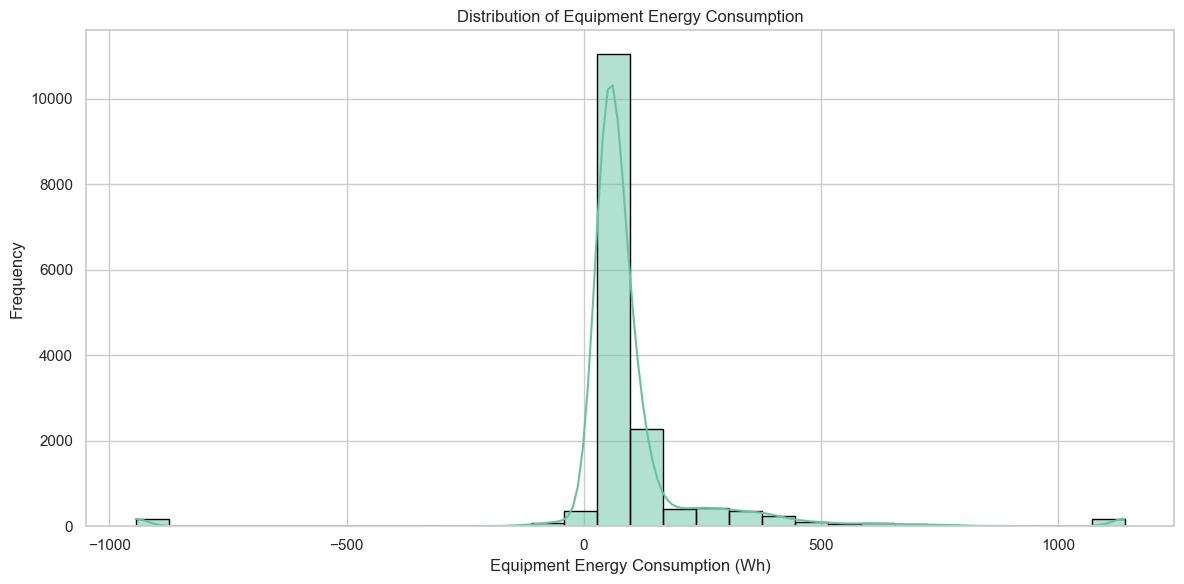


Target variable skewness: 0.6326913435409621


In [17]:
colors = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.histplot(df['equipment_energy_consumption'], bins=30, kde=True,
             color=colors[0], edgecolor='black')
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Equipment Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nTarget variable skewness:", df['equipment_energy_consumption'].skew())

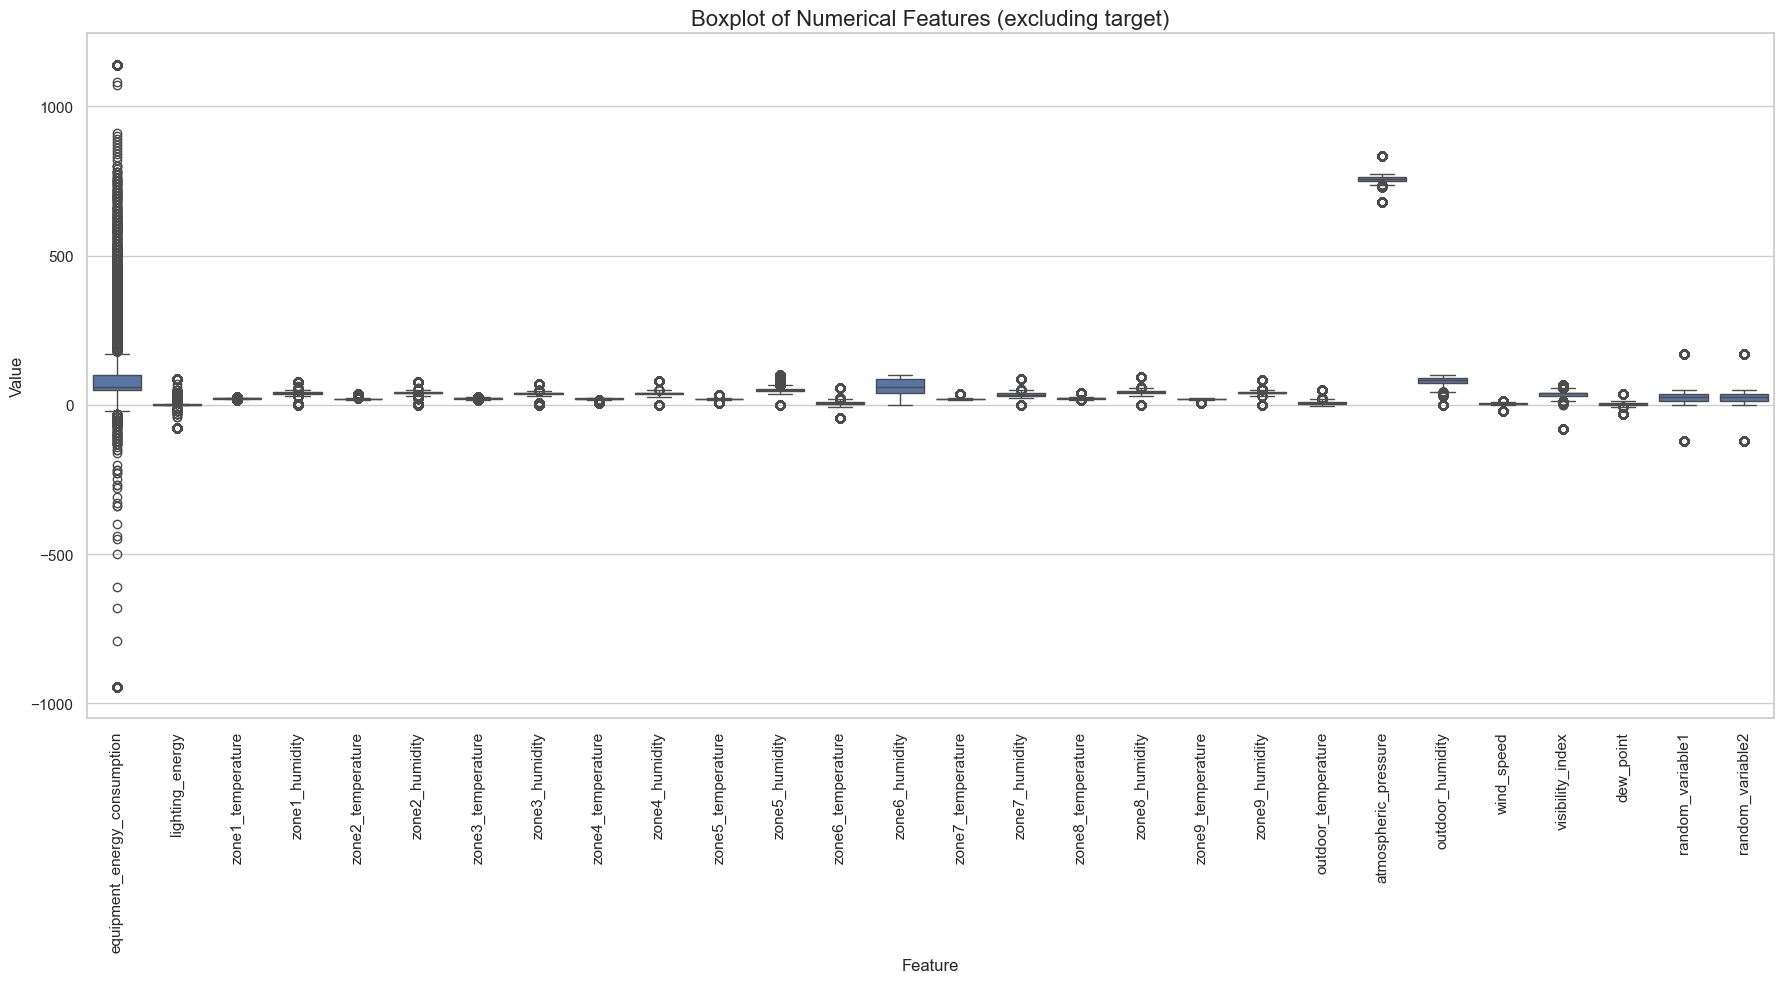

In [18]:
# Select numerical columns excluding the target variable
numerical_cols = df.select_dtypes(include='number').columns.tolist()
numerical_features = [col for col in numerical_cols]

# Melt the DataFrame to long-form for Seaborn
df_melted = df[numerical_features].melt(var_name='Feature', value_name='Value')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(18, 10))
sns.boxplot(x='Feature', y='Value', data=df_melted)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title
plt.title('Boxplot of Numerical Features (excluding target)', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

In [19]:
df['hour_of_day'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month_of_year'] = df['timestamp'].dt.month
df['hour']=df['timestamp'].dt.hour

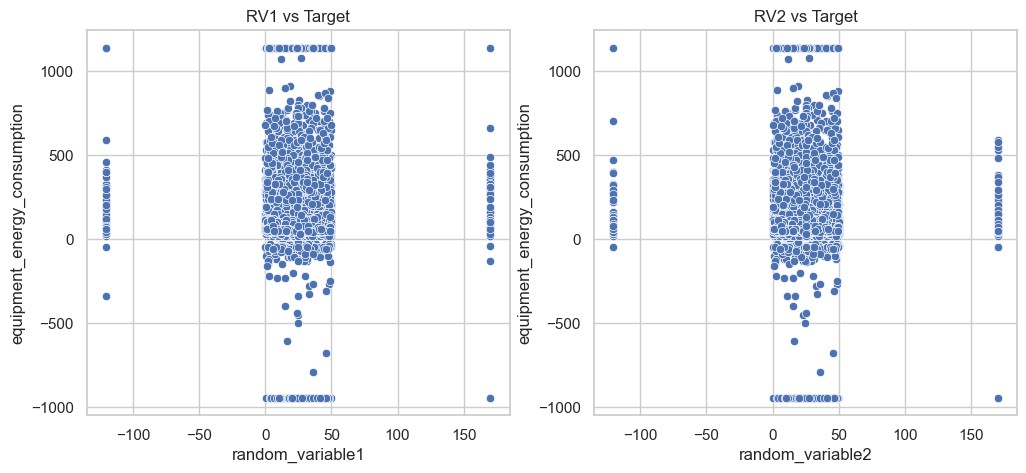

Correlation between equipment_energy_consumption and random_variable1: -0.016305646755655358
Correlation between equipment_energy_consumption and random_variable2: -0.011571909976780615


In [20]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot: random_variable1 vs equipment_energy_consumption
sns.scatterplot(x='random_variable1', y='equipment_energy_consumption', data=df, ax=axes[0])
axes[0].set_title("RV1 vs Target")

# Second scatter plot: random_variable2 vs equipment_energy_consumption
sns.scatterplot(x='random_variable2', y='equipment_energy_consumption', data=df, ax=axes[1])
axes[1].set_title("RV2 vs Target")

# Adjust layout
plt.show()

corr_rv1 = df['equipment_energy_consumption'].corr(df['random_variable1'])
corr_rv2 = df['equipment_energy_consumption'].corr(df['random_variable2'])

print(f"Correlation between equipment_energy_consumption and random_variable1: {corr_rv1}")
print(f"Correlation between equipment_energy_consumption and random_variable2: {corr_rv2}")

In [21]:
# Drop non-numeric or irrelevant columns like 'timestamp'
corr_matrix = df.drop(columns=['timestamp']).corr()

# Extract correlation values with respect to the target
target_corr = corr_matrix['equipment_energy_consumption'].abs().sort_values(ascending=False)

# Print correlations
print("Absolute correlation of all features with 'equipment_energy_consumption':\n")
print(target_corr)

Absolute correlation of all features with 'equipment_energy_consumption':

equipment_energy_consumption    1.000000
hour_of_day                     0.121090
hour                            0.121090
outdoor_humidity                0.056507
lighting_energy                 0.055806
zone3_temperature               0.055579
zone2_temperature               0.047257
outdoor_temperature             0.037308
zone1_temperature               0.036817
zone8_humidity                  0.034320
zone6_humidity                  0.033584
zone1_humidity                  0.031575
zone6_temperature               0.031352
zone9_humidity                  0.022956
zone4_temperature               0.021870
zone8_temperature               0.020258
random_variable1                0.016306
wind_speed                      0.015783
zone7_humidity                  0.013654
atmospheric_pressure            0.013638
zone3_humidity                  0.012437
zone7_temperature               0.011659
random_variable2       

In [22]:
# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb

drop_col=['timestamp','equipment_energy_consumption','random_variable1', 'random_variable2']
X = df.drop(columns=drop_col)
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

y = df['equipment_energy_consumption']

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42 # Adjust test_size as needed
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=45)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 11116
Validation set size: 2382
Testing set size: 2382


In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, n_jobs=-1),
    "LightGBM": lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbosity=-1)
}

results = {}

print("Training and evaluating baseline models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}
    print(f"{name} - RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)
print("\nBaseline Model Performance Summary:")
display(results_df)

Training and evaluating baseline models...
Linear Regression - RMSE: 185.934, MAE: 79.950, R²: 0.025
Ridge Regression - RMSE: 185.934, MAE: 79.950, R²: 0.025
Random Forest - RMSE: 184.599, MAE: 74.975, R²: 0.039
Gradient Boosting - RMSE: 182.278, MAE: 74.466, R²: 0.063
XGBoost - RMSE: 196.039, MAE: 91.336, R²: -0.084
LightGBM - RMSE: 180.797, MAE: 73.989, R²: 0.078

Baseline Model Performance Summary:


,RMSE,MAE,R²
LightGBM,180.797480,73.989003,0.078384
Gradient Boosting,182.278442,74.465652,0.063224
Random Forest,184.598715,74.974504,0.039223
Linear Regression,185.933889,79.949738,0.025275
Ridge Regression,185.933911,79.949619,0.025275
XGBoost,196.038573,91.336190,-0.083548
